In [1]:
train_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow"]

test_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow"]

In [2]:
import pandas as pd
from tqdm import tqdm

final_df = pd.DataFrame()
for url in tqdm(train_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_train_data.csv", index=False)

final_df = pd.DataFrame()
for url in tqdm(test_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_test_data.csv", index=False)

del final_df

100%|██████████| 2/2 [01:39<00:00, 49.60s/it]


In [3]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/ctu_13_train_data.csv')
test_data = pd.read_csv('/content/ctu_13_test_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [2]:
# df['SrcAddr'] = np.random.permutation(df['SrcAddr'])
# df['Sport'] = np.random.permutation(df['Sport'])

# Function to randomize IP address
# def randomize_ip():
#     return f"{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}"

# # Function to randomize port
# def randomize_port():
#     return np.random.randint(1024, 65536)  # Registered and dynamic ports

# # Apply randomization
# data['SrcAddr'] = data['SrcAddr'].apply(lambda x: randomize_ip())
# data['Sport'] = data['Sport'].apply(lambda x: randomize_port())

In [3]:
data.shape

(4632758, 15)

In [4]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [5]:
data['Label'].unique()

array(['flow=Background-UDP-Established', 'flow=Background',
       'flow=Background-Established-cmpgw-CVUT',
       'flow=Background-TCP-Established',
       'flow=From-Background-CVUT-Proxy',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=Background-UDP-Attempt',
       'flow=From-Normal-V42-UDP-CVUT-DNS-Server',
       'flow=Background-UDP-NTP-Established-1',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics3',
       'flow=Background-Attempt-cmpgw-CVUT',
       'flow=To-Background-CVUT-Proxy',
       'flow=Background-google-analytics2',
       'flow=Background-google-analytics6', 'flow=From-Normal-V42-Jist',
       'flow=Background-google-webmail', 'flow=Background-TCP-Attempt',
       'flow=Background-google-analytics12',
       'flow=Background-google-analytics1',
       'flow=Background-google-analytics13',
       'flow=Background-google-analytics14', 'flow=To-Background-Jist',
       'flow=Background-ajax.google', 'flow=From-Nor

In [6]:
def convertlabel(sample_data):
    if "botnet" in sample_data.lower():
        return 2
    elif 'background' in sample_data.lower():
        return 1
    else:
        return 0

data['Label'] = data['Label'].apply(lambda x:convertlabel(x))
test_data['Label'] = test_data['Label'].apply(lambda x:convertlabel(x))

In [7]:
data['Label'].value_counts()

,count
Label,
1,4531349
2,61902
0,39507


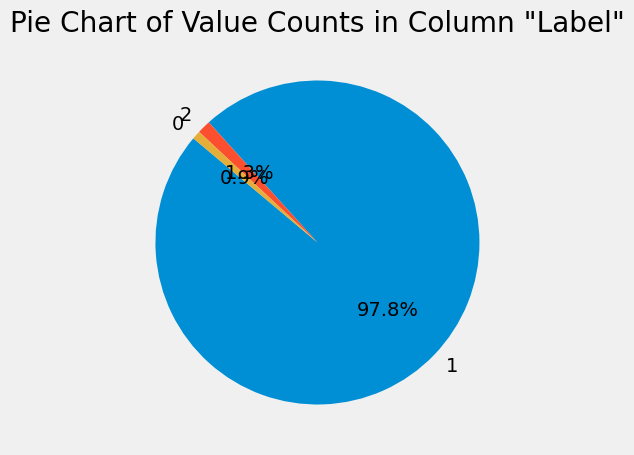

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [9]:
th = 1000
data1 = data[data['Label'] == 0].head(th)
data2 = data[data['Label'] == 1].head(th)
data3 = data[data['Label'] == 2].head(th)

data = pd.concat([data1,data2,data3])

th = 1000
data1 = test_data[test_data['Label'] == 0].head(th)
data2 = test_data[test_data['Label'] == 1].head(th)
data3 = test_data[test_data['Label'] == 2].head(th)

test_data = pd.concat([data1,data2,data3])

test_data.shape

(3000, 15)

In [10]:
data['Label'].value_counts()

,count
Label,
0,1000
1,1000
2,1000


In [11]:
data.to_csv('/content/ctu_13_sample_data.csv', index=False)
test_data.to_csv('/content/ctu_13_sample_test_data.csv', index=False)

In [91]:
data = pd.read_csv('/content/ctu_13_sample_data.csv')
test_data = pd.read_csv('/content/ctu_13_sample_test_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,NaN,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,NaN,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,NaN,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


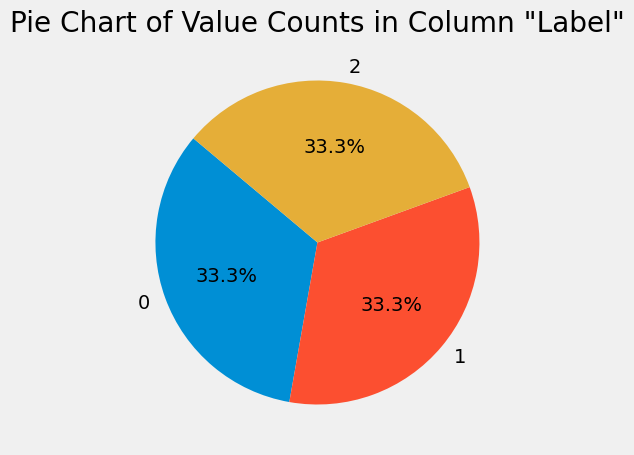

In [92]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [93]:
data.dtypes

,0
StartTime,object
Dur,float64
Proto,object
SrcAddr,object
Sport,object
Dir,object
DstAddr,object
Dport,object
State,object
sTos,float64


In [94]:
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.133333
Dir,0.000000
DstAddr,0.000000
Dport,0.133333
State,0.000000
sTos,0.100000


In [95]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,NaN,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,NaN,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,NaN,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


In [96]:
data = data[pd.to_numeric(data['Sport'], errors='coerce').notnull()]
data['Sport'] = pd.to_numeric(data['Sport'])

test_data = test_data[pd.to_numeric(test_data['Sport'], errors='coerce').notnull()]
test_data['Sport'] = pd.to_numeric(test_data['Sport'])

data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [97]:
data = data[pd.to_numeric(data['Dport'], errors='coerce').notnull()]
data['Dport'] = pd.to_numeric(data['Dport'])

test_data = test_data[pd.to_numeric(test_data['Dport'], errors='coerce').notnull()]
test_data['Dport'] = pd.to_numeric(test_data['Dport'])

data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [98]:
test_data = test_data.fillna(value=0.0)
data = data.fillna(value=0.0)
data.isna().mean() * 100

,0
StartTime,0.0
Dur,0.0
Proto,0.0
SrcAddr,0.0
Sport,0.0
Dir,0.0
DstAddr,0.0
Dport,0.0
State,0.0
sTos,0.0


In [99]:
data.describe()

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,2977.000000,2977.000000,2977.000000,2977.0,2977.0,2977.000000,2.977000e+03,2.977000e+03,2977.000000
mean,453.830185,26762.274437,5238.795768,0.0,0.0,188.256634,1.336155e+05,1.223028e+05,1.000336
std,1083.531994,22960.660812,12049.638971,0.0,0.0,3608.815860,3.202968e+06,3.120164e+06,0.819577
min,0.000000,1.000000,20.000000,0.0,0.0,1.000000,6.000000e+01,6.000000e+01,0.000000
25%,0.000403,1782.000000,53.000000,0.0,0.0,2.000000,1.900000e+02,7.500000e+01,0.000000
50%,0.404371,33107.000000,80.000000,0.0,0.0,3.000000,2.830000e+02,1.860000e+02,1.000000
75%,9.033020,49289.000000,6601.000000,0.0,0.0,10.000000,1.129000e+03,4.570000e+02,2.000000
max,3599.995117,65282.000000,65520.000000,0.0,0.0,162760.000000,1.371365e+08,1.328164e+08,2.000000


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StartTime  2977 non-null   object 
 1   Dur        2977 non-null   float64
 2   Proto      2977 non-null   object 
 3   SrcAddr    2977 non-null   object 
 4   Sport      2977 non-null   int64  
 5   Dir        2977 non-null   object 
 6   DstAddr    2977 non-null   object 
 7   Dport      2977 non-null   int64  
 8   State      2977 non-null   object 
 9   sTos       2977 non-null   float64
 10  dTos       2977 non-null   float64
 11  TotPkts    2977 non-null   int64  
 12  TotBytes   2977 non-null   int64  
 13  SrcBytes   2977 non-null   int64  
 14  Label      2977 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 372.1+ KB


In [102]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,0.0,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,0.0,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,0.0,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


In [103]:
data['Proto'].value_counts()

,count
Proto,
tcp,1507
udp,1464
rtp,5
rtcp,1


In [104]:
data['Dir'].value_counts()

,count
Dir,
<->,1404
->,1332
<?>,221
?>,20


In [105]:
data['State'].value_counts()

,count
State,
CON,1404
S_,619
FSPA_FSPA,356
PA_PA,95
FSA_FSA,86
...,...
PA_PAC,1
PA_FPA,1
FRPA_RA,1


In [106]:
data.isna().sum().sum()

0

In [107]:
data.duplicated().sum()

0

In [108]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['Hour'] = data['StartTime'].dt.hour
data['Minute'] = data['StartTime'].dt.minute
data['Second'] = data['StartTime'].dt.second
data['DayOfWeek'] = data['StartTime'].dt.dayofweek
data['Day'] = data['StartTime'].dt.day

test_data['StartTime'] = pd.to_datetime(test_data['StartTime'])
test_data['Hour'] = test_data['StartTime'].dt.hour
test_data['Minute'] = test_data['StartTime'].dt.minute
test_data['Second'] = test_data['StartTime'].dt.second
test_data['DayOfWeek'] = test_data['StartTime'].dt.dayofweek
test_data['Day'] = test_data['StartTime'].dt.day

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartTime  2977 non-null   datetime64[ns]
 1   Dur        2977 non-null   float64       
 2   Proto      2977 non-null   object        
 3   SrcAddr    2977 non-null   object        
 4   Sport      2977 non-null   int64         
 5   Dir        2977 non-null   object        
 6   DstAddr    2977 non-null   object        
 7   Dport      2977 non-null   int64         
 8   State      2977 non-null   object        
 9   sTos       2977 non-null   float64       
 10  dTos       2977 non-null   float64       
 11  TotPkts    2977 non-null   int64         
 12  TotBytes   2977 non-null   int64         
 13  SrcBytes   2977 non-null   int64         
 14  Label      2977 non-null   int64         
 15  Hour       2977 non-null   int32         
 16  Minute     2977 non-null   int32         
 17  

In [110]:
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']
numerical_columns = [col for col in data.columns if col not in categorical_columns]

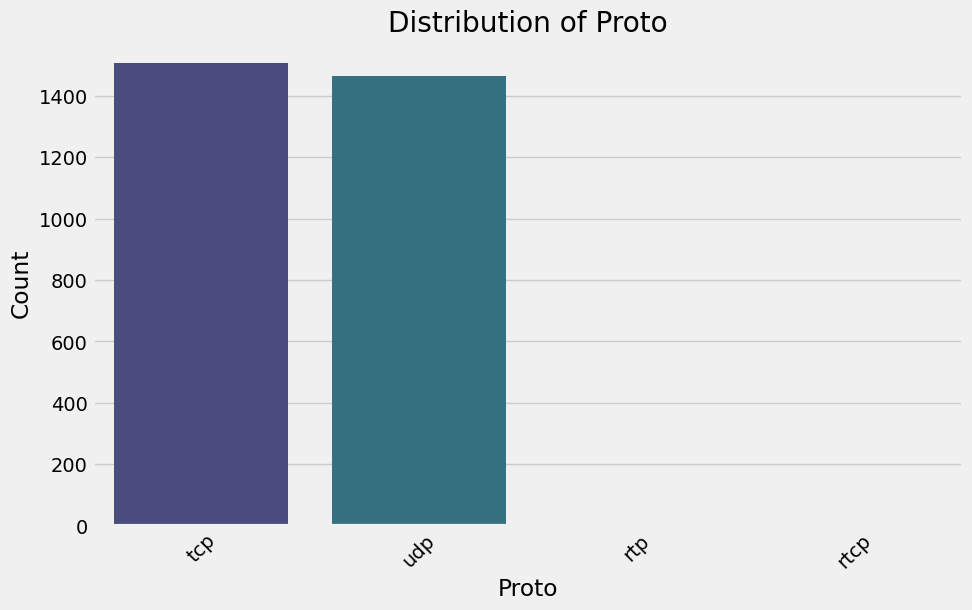

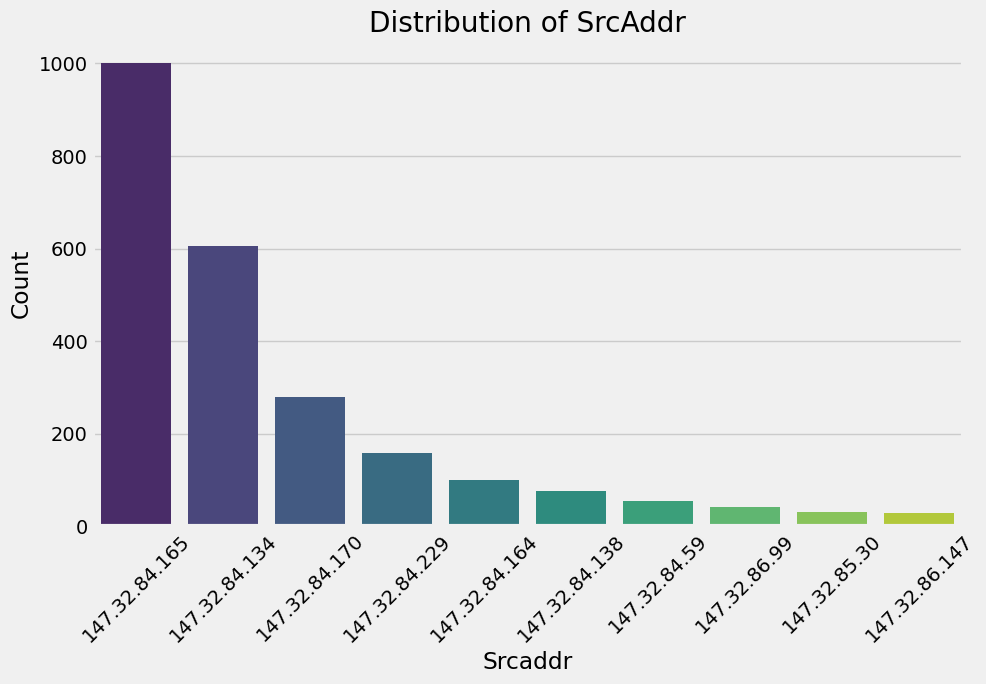

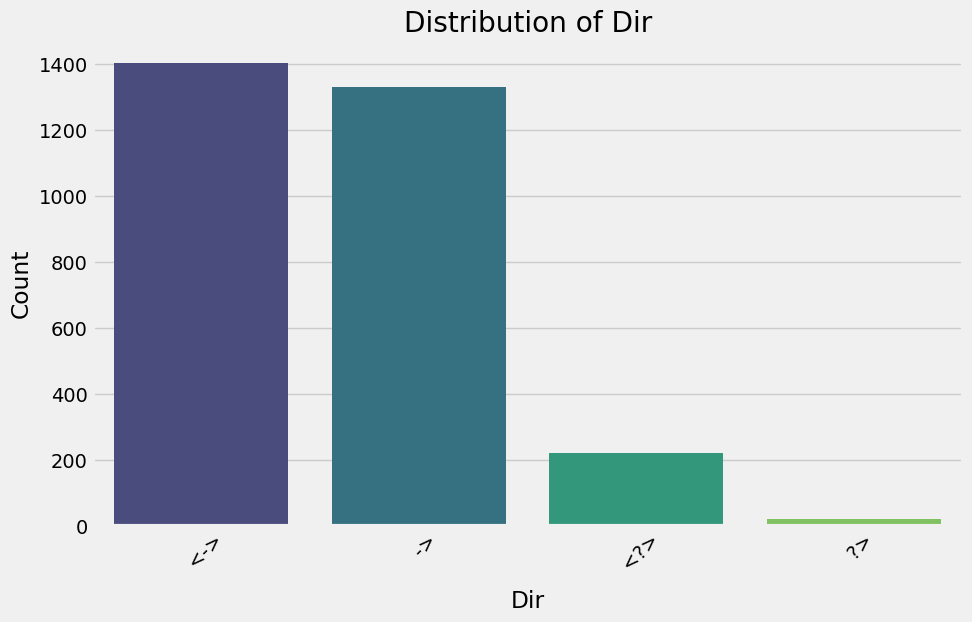

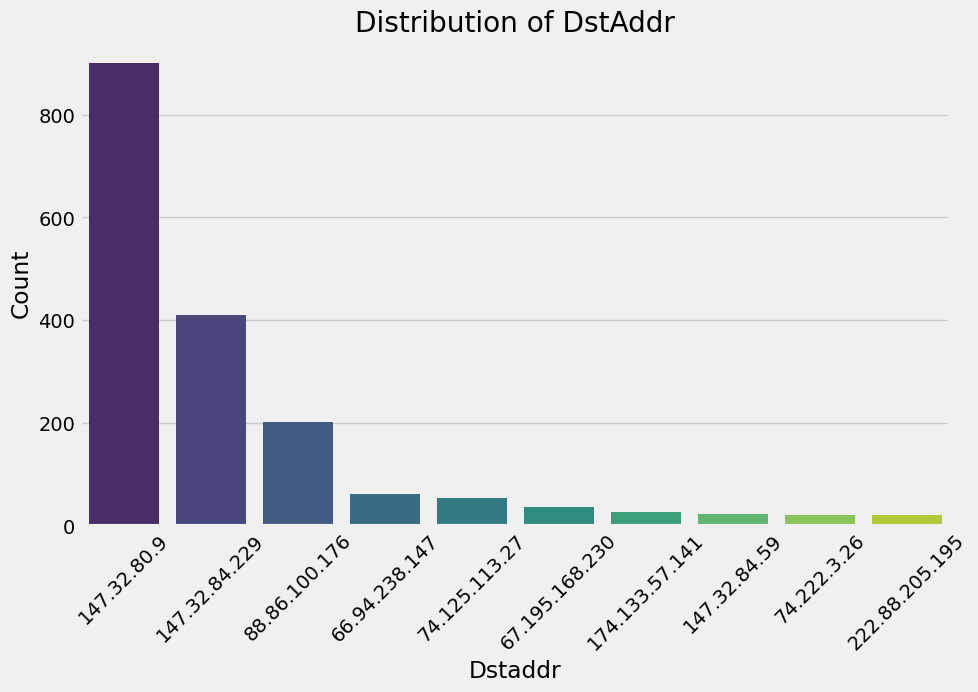

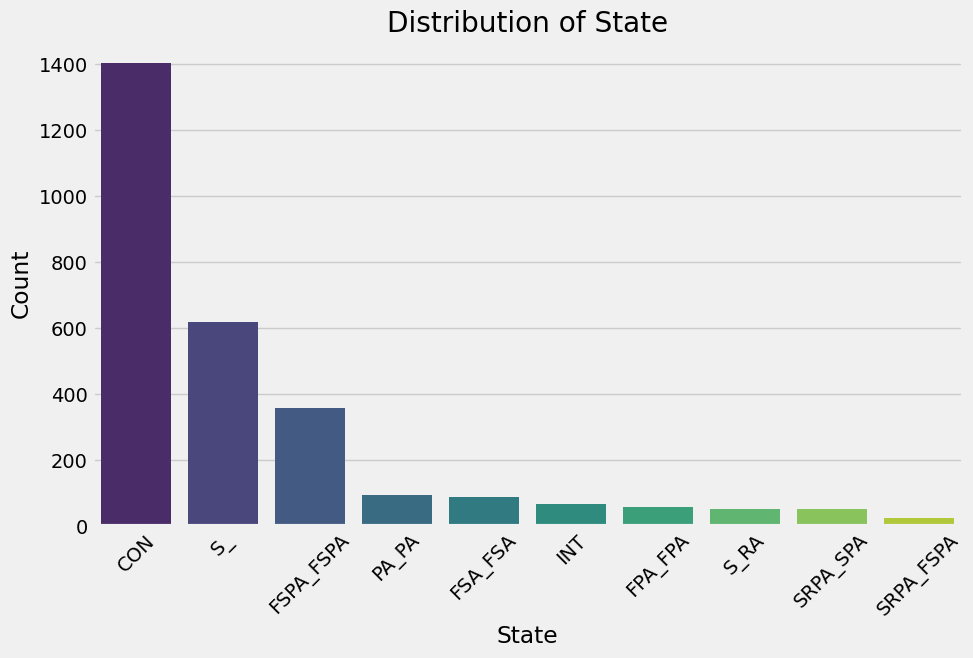

In [111]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']

# Plotting each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().head(10).index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print('\n\n')

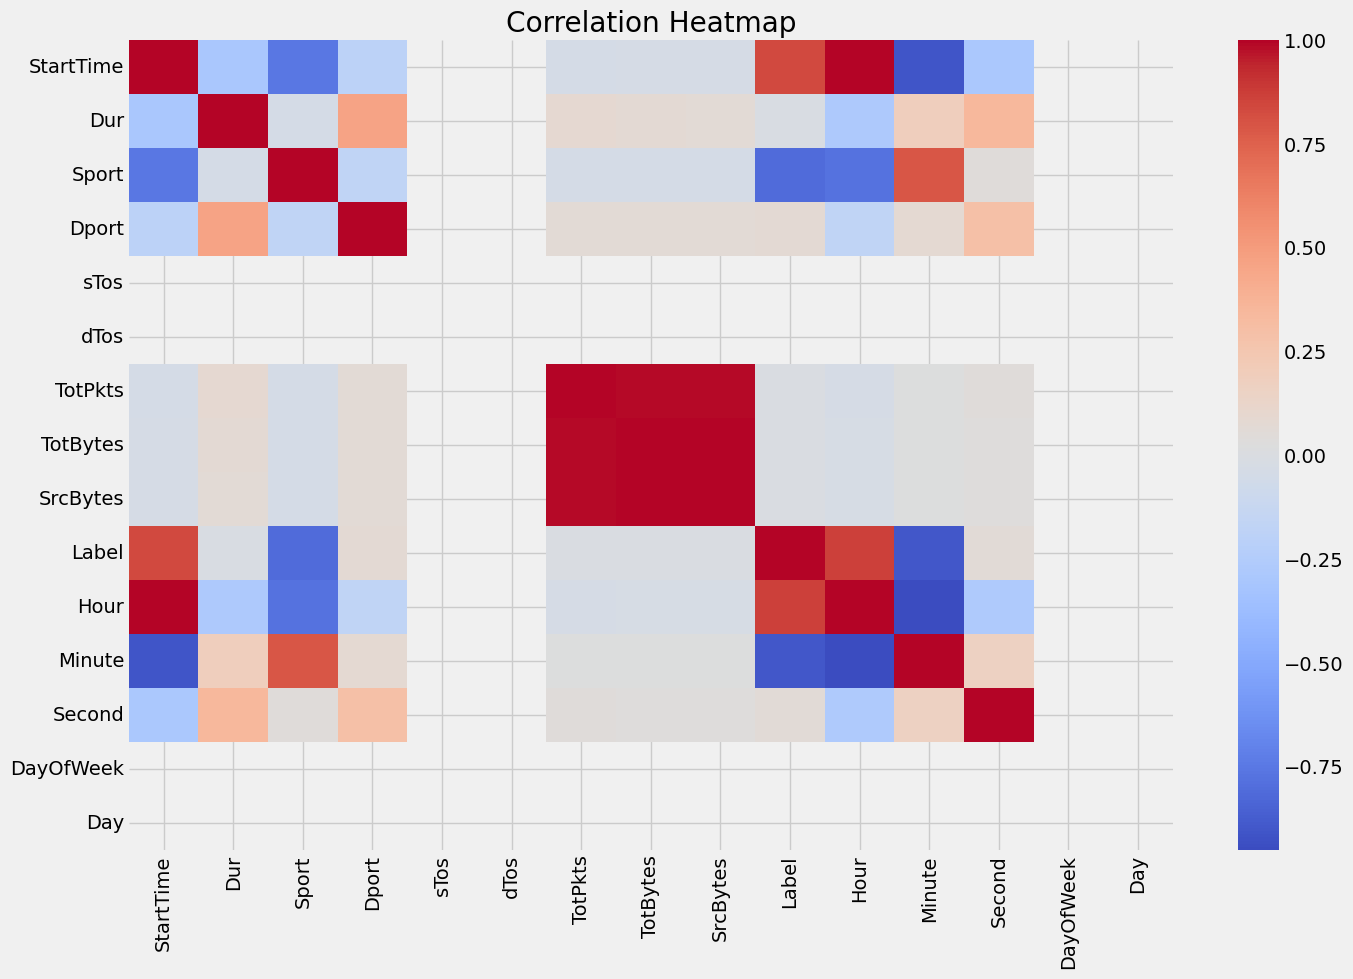

In [112]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [113]:
data[numerical_columns].corr()['Dur'].sort_values(ascending=False)

,Dur
Dur,1.000000
Dport,0.459872
Second,0.350342
Minute,0.187611
TotPkts,0.091555
TotBytes,0.071425
SrcBytes,0.068174
Label,-0.006575
Sport,-0.042020
Hour,-0.278567


In [114]:
data[numerical_columns].corr()

,StartTime,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second,DayOfWeek,Day
StartTime,1.000000,-0.302288,-0.758454,-0.195426,NaN,NaN,-0.036770,-0.030991,-0.029962,0.837608,0.994256,-0.912745,-0.295197,NaN,NaN
Dur,-0.302288,1.000000,-0.042020,0.459872,NaN,NaN,0.091555,0.071425,0.068174,-0.006575,-0.278567,0.187611,0.350342,NaN,NaN
Sport,-0.758454,-0.042020,1.000000,-0.173657,NaN,NaN,-0.039616,-0.040581,-0.040822,-0.811758,-0.778441,0.787759,0.045250,NaN,NaN
Dport,-0.195426,0.459872,-0.173657,1.000000,NaN,NaN,0.066875,0.062880,0.062798,0.071214,-0.170593,0.084048,0.295801,NaN,NaN
sTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotPkts,-0.036770,0.091555,-0.039616,0.066875,NaN,NaN,1.000000,0.988008,0.985851,0.000909,-0.033749,0.022348,0.041299,NaN,NaN
TotBytes,-0.030991,0.071425,-0.040581,0.062880,NaN,NaN,0.988008,1.000000,0.999703,0.000455,-0.028563,0.019285,0.034662,NaN,NaN
SrcBytes,-0.029962,0.068174,-0.040822,0.062798,NaN,NaN,0.985851,0.999703,1.000000,0.000045,-0.027660,0.018826,0.032958,NaN,NaN
Label,0.837608,-0.006575,-0.811758,0.071214,NaN,NaN,0.000909,0.000455,0.000045,1.000000,0.867629,-0.902161,0.056914,NaN,NaN


In [115]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
constant_columns

['sTos', 'dTos', 'DayOfWeek', 'Day']

In [116]:
data[constant_columns[0]].value_counts()

,count
sTos,
0.0,2977


In [117]:
data = data.drop(columns=constant_columns)
test_data = test_data.drop(columns=constant_columns)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,141,141,0,9,46,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,247,247,0,9,46,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,173,173,0,9,46,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,207,72,0,9,46,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,247,72,0,9,46,54


In [118]:
# Calculate the correlation matrix
corr_matrix = data[numerical_columns].corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
threshold = 0.8
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
high_corr_features

['TotBytes', 'SrcBytes', 'Label', 'Hour', 'Minute']

In [119]:
if 'Label' in high_corr_features:
    high_corr_features.remove('Label')
high_corr_features

['TotBytes', 'SrcBytes', 'Hour', 'Minute']

In [120]:
data = data.drop(columns=high_corr_features)
test_data = test_data.drop(columns=high_corr_features)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,0,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,0,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,0,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,0,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,0,54


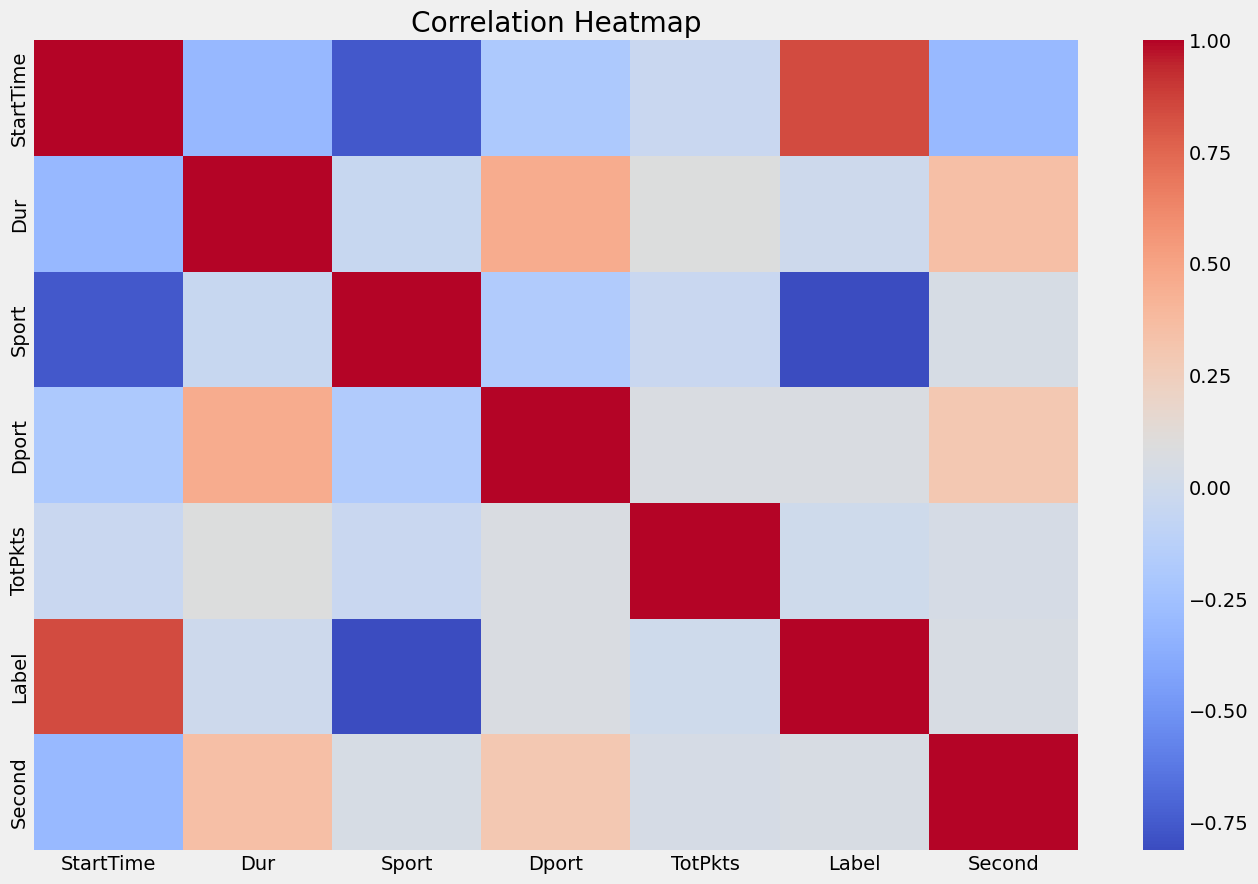

In [121]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [122]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,0,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,0,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,0,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,0,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,0,54


In [123]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'TotPkts', 'Label', 'Second'],
      dtype='object')

In [124]:
# Convert Source and Destination IP addresses to numerical values using hashing
data['SrcAddr'] = data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
data['DstAddr'] = data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
data['SrcAddr'] = data['SrcAddr'].fillna(-1).astype(int)
data['DstAddr'] = data['DstAddr'].fillna(-1).astype(int)

# Convert Source and Destination IP addresses to numerical values using hashing
test_data['SrcAddr'] = test_data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
test_data['DstAddr'] = test_data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
test_data['SrcAddr'] = test_data['SrcAddr'].fillna(-1).astype(int)
test_data['DstAddr'] = test_data['DstAddr'].fillna(-1).astype(int)

In [125]:
data.dtypes

,0
StartTime,datetime64[ns]
Dur,float64
Proto,object
SrcAddr,int64
Sport,int64
Dir,object
DstAddr,int64
Dport,int64
State,object
TotPkts,int64


In [126]:
data = data.drop(columns=['StartTime'])
data = data.drop(columns=['SrcAddr','Sport'])

test_data = test_data.drop(columns=['StartTime'])
test_data = test_data.drop(columns=['SrcAddr','Sport'])

In [153]:
X = data.drop(columns=['Label'])
y = data[['Label']]

X_test = test_data.drop(columns=['Label'])
y_test = test_data[['Label']]

In [154]:
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,udp,->,26315,54230,INT,1,53
1,0.000000,udp,->,26315,58314,INT,1,54
2,0.000000,udp,->,26315,54823,INT,1,54
3,0.000291,udp,<->,50118,53,CON,2,54
4,0.000321,udp,<->,50118,53,CON,2,54


In [155]:
categorical_cols = ['Proto', 'State', 'Dir']

In [156]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X[categorical_cols] = le.fit_transform(X[categorical_cols])
X_test[categorical_cols] = le.transform(X_test[categorical_cols])
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,3.0,0.0,26315,54230,30.0,1,53
1,0.000000,3.0,0.0,26315,58314,30.0,1,54
2,0.000000,3.0,0.0,26315,54823,30.0,1,54
3,0.000291,3.0,2.0,50118,53,1.0,2,54
4,0.000321,3.0,2.0,50118,53,1.0,2,54


In [157]:
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [158]:
processed_data = pd.concat([X,y],axis=1)
# test_processed_data = pd.concat([X_test,y_test],axis=1)
processed_data.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second,Label
0,0.000000,3.0,0.0,26315,54230,30.0,1,53,0
1,0.000000,3.0,0.0,26315,58314,30.0,1,54,0
2,0.000000,3.0,0.0,26315,54823,30.0,1,54,0
3,0.000291,3.0,2.0,50118,53,1.0,2,54,0
4,0.000321,3.0,2.0,50118,53,1.0,2,54,0


In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
processed_data = scaler.fit_transform(processed_data)
# test_processed_data = scaler.transform(test_processed_data)

In [160]:
processed_data

array([[-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.84412436, -1.22075613],
       [-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.89765306, -1.22075613],
       [-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.89765306, -1.22075613],
       ...,
       [-0.41119825, -0.96869519, -1.07670303, ..., -0.05134309,
        -0.44056438,  1.21993629],
       [-0.41558161, -0.96869519, -1.07670303, ..., -0.04968022,
        -0.44056438,  1.21993629],
       [-0.41094122, -0.96869519, -1.07670303, ..., -0.05134309,
        -0.44056438,  1.21993629]])

In [161]:
processed_data.shape

(2977, 9)

In [162]:
import tensorflow as tf
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

latent_dim = 32  # Dimension of noise vector
clip_value = 0.01  # Weight clipping parameter

# Custom Wasserstein loss
def wasserstein_loss(y_true, y_pred):
    return tf.keras.backend.mean(y_true * y_pred)

# Generator remains similar
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        # Output dimension matches processed_data; using sigmoid assuming data is scaled [0,1]
        layers.Dense(processed_data.shape[1], activation='sigmoid')
    ])
    return model

# Critic (formerly Discriminator) with linear output
def build_critic():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=processed_data.shape[1]),
        layers.Dense(64, activation='relu'),
        # No activation here (linear output) for Wasserstein loss
        layers.Dense(1)
    ])
    return model

# Initialize models
generator = build_generator()
critic = build_critic()

In [163]:
generator.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,593 (45.29 KB)

 Trainable params: 11,593 (45.29 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
critic.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

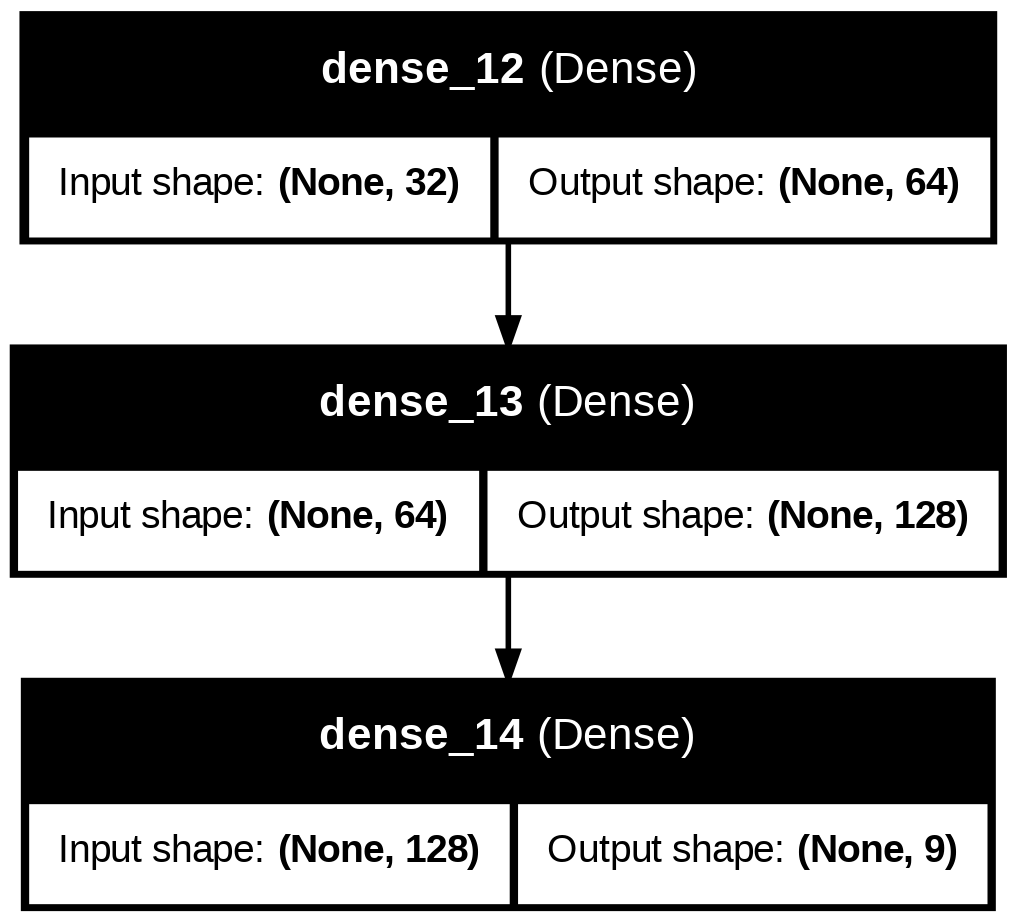

In [165]:
from tensorflow.keras.utils import plot_model
plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

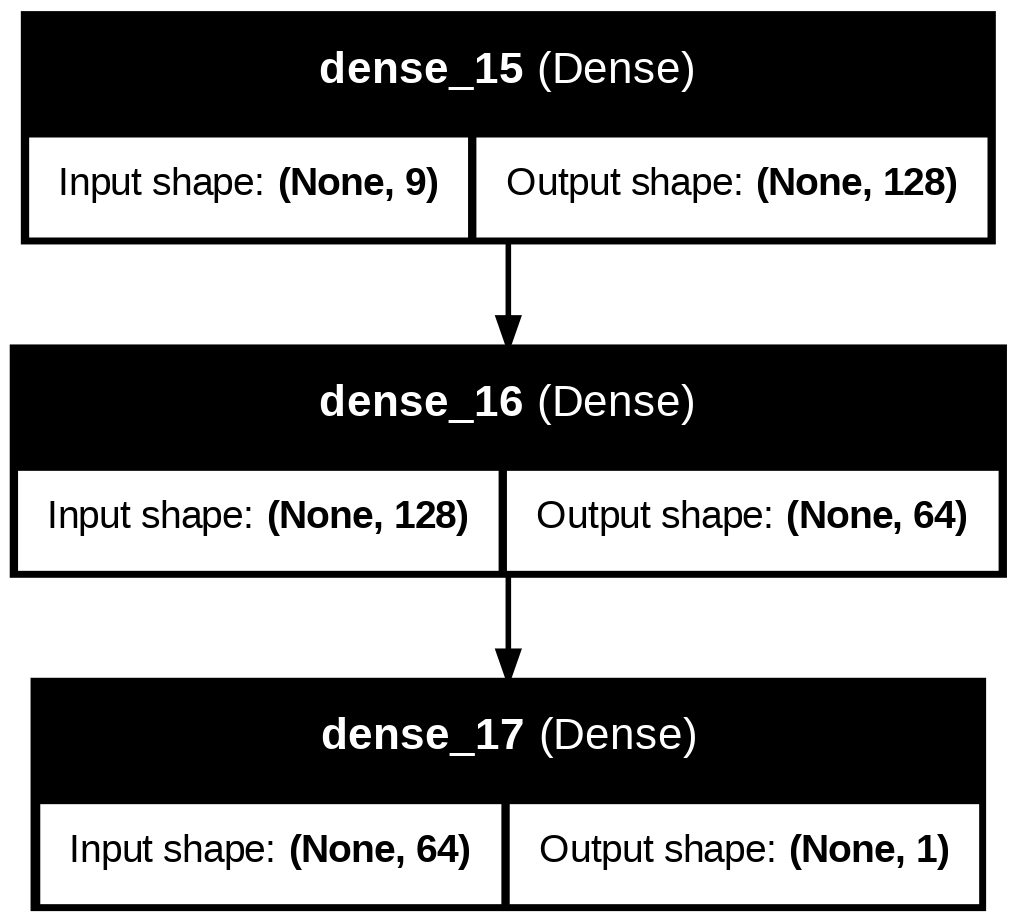

In [166]:
plot_model(critic, to_file='critic_plot.png', show_shapes=True, show_layer_names=True)

In [167]:
# Compile the critic using the Wasserstein loss and RMSprop optimizer
critic.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
                 loss=wasserstein_loss)

# Build the combined GAN model (Generator + Critic)
# Freeze the critic when training the generator
critic.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = critic(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
            loss=wasserstein_loss)

In [168]:
# Training parameters
epochs = 10
batch_size = 32

In [169]:
# Dictionary to store metrics
metrics = {
    "epoch": [],
    "critic_loss": [],
    "g_loss": []
}

# Training loop with tqdm for progress bar
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    # ---------------------
    #  Train the Critic
    # ---------------------
    # Sample a random batch of real data
    idx = np.random.randint(0, processed_data.shape[0], batch_size)
    real_data = processed_data[idx]

    # Generate a batch of fake data
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise)

    # For WGAN, label real data as -1 and fake data as 1
    real_labels = -np.ones((batch_size, 1))
    fake_labels = np.ones((batch_size, 1))

    # Train on real and fake data
    critic_loss_real = critic.train_on_batch(real_data, real_labels)
    critic_loss_fake = critic.train_on_batch(fake_data, fake_labels)
    critic_loss = 0.5 * (critic_loss_real + critic_loss_fake)

    # Weight clipping for the critic
    for layer in critic.layers:
        weights = layer.get_weights()
        weights = [np.clip(w, -clip_value, clip_value) for w in weights]
        layer.set_weights(weights)

    # ---------------------
    #  Train the Generator
    # ---------------------
    # Generator training: the generator tries to get the critic to output -1 on fake data.
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = -np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Save metrics
    metrics["epoch"].append(epoch)
    metrics["critic_loss"].append(critic_loss)
    metrics["g_loss"].append(g_loss)

    # Optionally print progress
    print(f"Epoch {epoch} - Critic Loss: {critic_loss:.4f}, Generator Loss: {g_loss:.4f}")

Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Training Progress:  10%|█         | 1/10 [00:01<00:09,  1.09s/it]

Epoch 1 - Critic Loss: 0.0207, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Training Progress:  20%|██        | 2/10 [00:01<00:04,  1.96it/s]

Epoch 2 - Critic Loss: -0.0282, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Training Progress:  30%|███       | 3/10 [00:01<00:02,  2.95it/s]

Epoch 3 - Critic Loss: -0.0177, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Training Progress:  40%|████      | 4/10 [00:01<00:01,  3.84it/s]

Epoch 4 - Critic Loss: -0.0129, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Training Progress:  50%|█████     | 5/10 [00:01<00:01,  4.76it/s]

Epoch 5 - Critic Loss: -0.0102, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Training Progress:  60%|██████    | 6/10 [00:01<00:00,  5.56it/s]

Epoch 6 - Critic Loss: -0.0084, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Training Progress:  70%|███████   | 7/10 [00:01<00:00,  5.88it/s]

Epoch 7 - Critic Loss: -0.0071, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Training Progress:  80%|████████  | 8/10 [00:02<00:00,  6.12it/s]

Epoch 8 - Critic Loss: -0.0062, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Training Progress:  90%|█████████ | 9/10 [00:02<00:00,  5.97it/s]

Epoch 9 - Critic Loss: -0.0055, Generator Loss: -0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 10 - Critic Loss: -0.0049, Generator Loss: -0.0001

Training Progress: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]

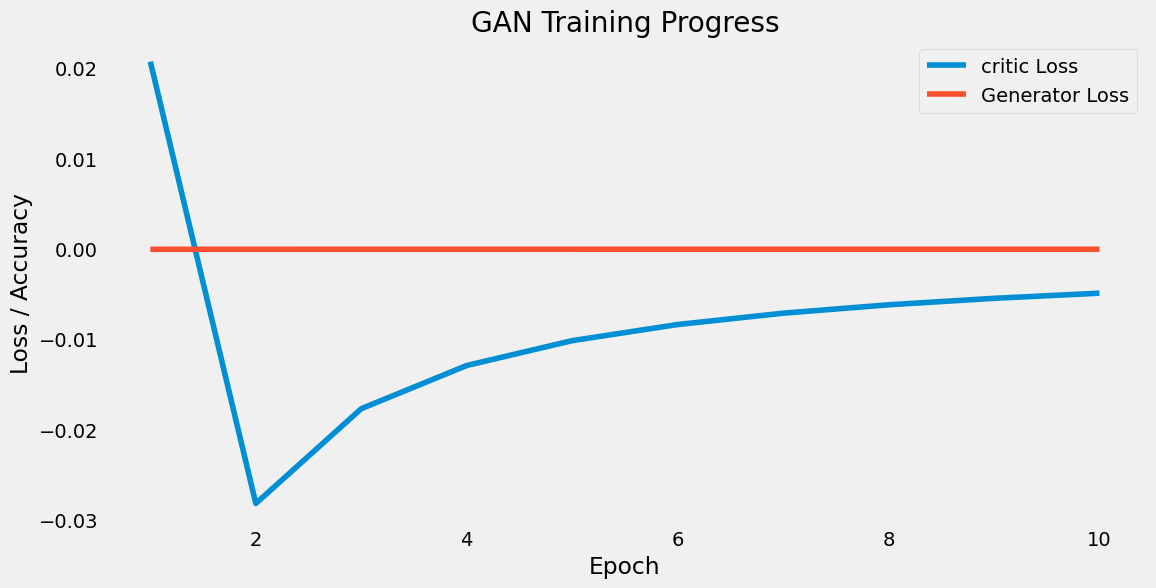

In [170]:
# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(metrics["epoch"], metrics["critic_loss"], label="critic Loss")
plt.plot(metrics["epoch"], metrics["g_loss"], label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.title("GAN Training Progress")
plt.legend()
plt.grid()
plt.show()

In [171]:
noise = np.random.normal(0, 1, (processed_data.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)
synthetic_data = processed_data
synthetic_data[:,-1] = y.values.ravel()
print("Synthetic Data:")
print(synthetic_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Synthetic Data:
[[-0.41891373  1.01058111 -1.07670303 ... -0.05189738  0.84412436
   0.        ]
 [-0.41891373  1.01058111 -1.07670303 ... -0.05189738  0.89765306
   0.        ]
 [-0.41891373  1.01058111 -1.07670303 ... -0.05189738  0.89765306
   0.        ]
 ...
 [-0.41119825 -0.96869519 -1.07670303 ... -0.05134309 -0.44056438
   2.        ]
 [-0.41558161 -0.96869519 -1.07670303 ... -0.04968022 -0.44056438
   2.        ]
 [-0.41094122 -0.96869519 -1.07670303 ... -0.05134309 -0.44056438
   2.        ]]


In [172]:
synthetic_data.shape

(2977, 9)

In [173]:
X_train = synthetic_data[:,:-1]
y_train = synthetic_data[:,-1]

# X_test = test_processed_data[:,:-1]
# y_test = test_processed_data[:,-1]

In [174]:
np.unique(y_train)

array([0., 1., 2.])

In [175]:
np.unique(y_test)

array([0, 1, 2])

In [176]:
X_train.shape,X_test.shape

((2977, 8), (2977, 8))

In [177]:
y_train.shape,y_test.shape

((2977,), (2977, 1))

In [178]:
label = np.unique(y).tolist()
label

[0, 1, 2]

In [186]:
y_test = y_test['Label'].values.ravel()

In [187]:
np.unique(y_train)

array([0., 1., 2.])

In [188]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 1.3999617099761963
Prediction time (sec) = 0.011219978332519531

Training score = 0.8399951915105289
Testing score = 0.5358303088364438

No of misclassified for class 0 (test data) = 6
No of misclassified for class 1 (test data) = 378
No of misclassified for class 2 (test data) = 1000
Total no of misclassified points (test data) = 1384
Total % of misclassified points (test data) = 0.4648975478669802

Training log_loss = 0.38644186342284664
Testing log_loss = 16.75660607676793

Confusion matrix:


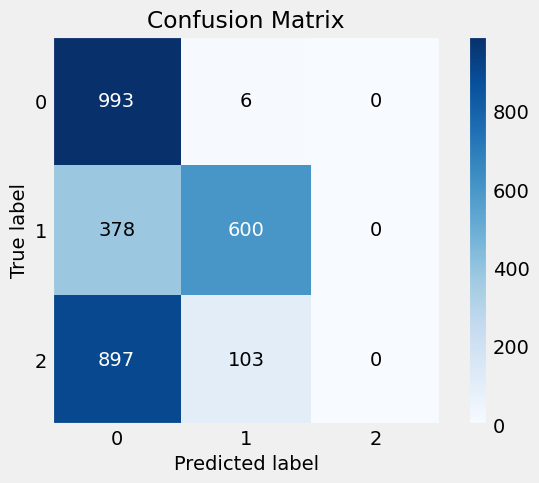

Classification report:

              precision    recall  f1-score   support

           0       0.44      0.99      0.61       999
           1       0.85      0.61      0.71       978
           2       0.00      0.00      0.00      1000

    accuracy                           0.54      2977
   macro avg       0.43      0.54      0.44      2977
weighted avg       0.42      0.54      0.44      2977

**************************************************************************


In [189]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.021497249603271484
Prediction time (sec) = 0.00305938720703125

Training score = 0.85771977089564
Testing score = 0.530717834398816

No of misclassified for class 0 (test data) = 6
No of misclassified for class 1 (test data) = 393
No of misclassified for class 2 (test data) = 1000
Total no of misclassified points (test data) = 1399
Total % of misclassified points (test data) = 0.4699361773597581

Confusion matrix:


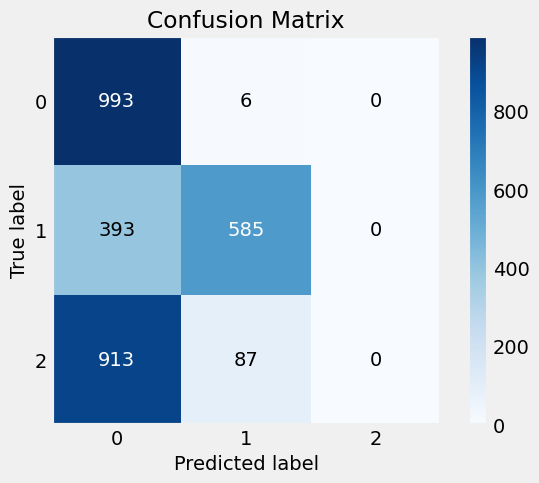

Classification report:

              precision    recall  f1-score   support

           0       0.43      0.99      0.60       999
           1       0.86      0.60      0.71       978
           2       0.00      0.00      0.00      1000

    accuracy                           0.53      2977
   macro avg       0.43      0.53      0.44      2977
weighted avg       0.43      0.53      0.43      2977

**************************************************************************


In [190]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.01552128791809082
Prediction time (sec) = 0.0031147003173828125

Training score = 0.9882970004769596
Testing score = 0.1819243353783231

No of misclassified for class 0 (test data) = 999
No of misclassified for class 1 (test data) = 588
No of misclassified for class 2 (test data) = 853
Total no of misclassified points (test data) = 2440
Total % of misclassified points (test data) = 0.8196170641585488

Training log_loss = 0.02312934177395797
Testing log_loss = 29.541993372336524

Confusion matrix:


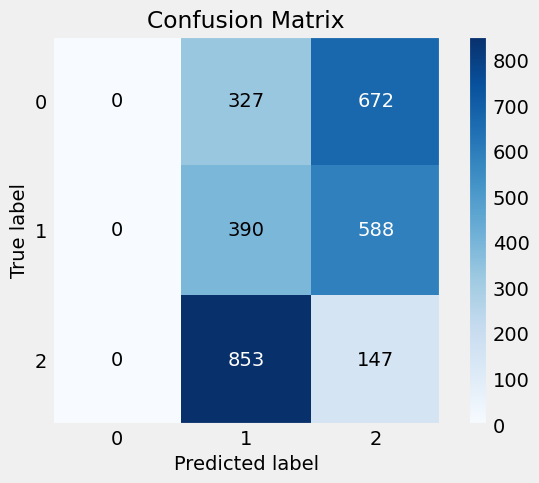

Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       999
           1       0.25      0.40      0.31       978
           2       0.10      0.15      0.12      1000

    accuracy                           0.18      2977
   macro avg       0.12      0.18      0.14      2977
weighted avg       0.12      0.18      0.14      2977

**************************************************************************


In [191]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.34969520568847656
Prediction time (sec) = 0.03200984001159668

Training score = 0.9882970004769596
Testing score = 0.3333333333333333

No of misclassified for class 0 (test data) = 999
No of misclassified for class 1 (test data) = 0
No of misclassified for class 2 (test data) = 1000
Total no of misclassified points (test data) = 1999
Total % of misclassified points (test data) = 0.6714813570708767

Training log_loss = 0.023129341773957972
Testing log_loss = 2.0782213358022683

Confusion matrix:


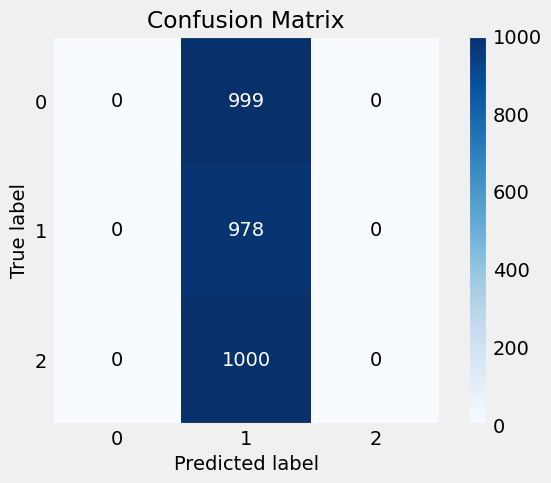

Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       999
           1       0.33      1.00      0.49       978
           2       0.00      0.00      0.00      1000

    accuracy                           0.33      2977
   macro avg       0.11      0.33      0.16      2977
weighted avg       0.11      0.33      0.16      2977

**************************************************************************


In [192]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.3899376392364502
Prediction time (sec) = 0.03234052658081055

Training score = 0.9882826712192765
Testing score = 0.3353333333333333

No of misclassified for class 0 (test data) = 999
No of misclassified for class 1 (test data) = 0
No of misclassified for class 2 (test data) = 994
Total no of misclassified points (test data) = 1993
Total % of misclassified points (test data) = 0.6694659052737655

Training log_loss = 0.04070512975630551
Testing log_loss = 2.152667206682806

Confusion matrix:


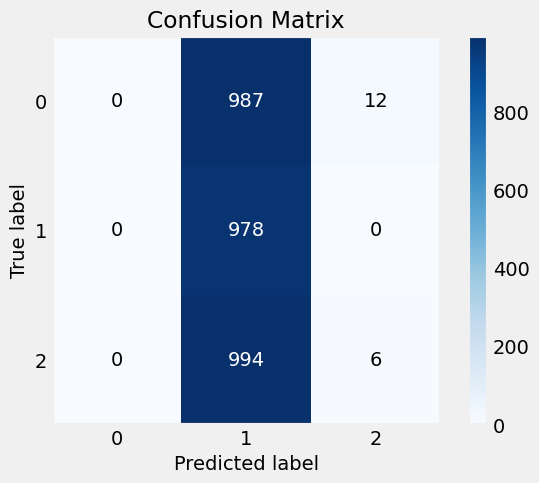

Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       999
           1       0.33      1.00      0.50       978
           2       0.33      0.01      0.01      1000

    accuracy                           0.33      2977
   macro avg       0.22      0.34      0.17      2977
weighted avg       0.22      0.33      0.17      2977

**************************************************************************


In [193]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [194]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results]
s2=['LR','LSVC','DTC','ETC','RFC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.839995,0.535830,1384,0.464898,0.386442,16.756606,1.399962,0.011220
1,LSVC,0.857720,0.530718,1399,0.469936,NaN,NaN,0.021497,0.003059
2,DTC,0.988297,0.181924,2440,0.819617,0.023129,29.541993,0.015521,0.003115
3,ETC,0.988297,0.333333,1999,0.671481,0.023129,2.078221,0.349695,0.032010
4,RFC,0.988283,0.335333,1993,0.669466,0.040705,2.152667,0.389938,0.032341


In [195]:
scaler

StandardScaler()

In [196]:
rfc

RandomForestClassifier(class_weight='balanced')

In [197]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(scaler, rfc)
joblib.dump(pipeline, 'rfc_pipeline.joblib')

['rfc_pipeline.joblib']

In [198]:
X

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,3.0,0.0,26315,54230,30.0,1,53
1,0.000000,3.0,0.0,26315,58314,30.0,1,54
2,0.000000,3.0,0.0,26315,54823,30.0,1,54
3,0.000291,3.0,2.0,50118,53,1.0,2,54
4,0.000321,3.0,2.0,50118,53,1.0,2,54
...,...,...,...,...,...,...,...,...
2995,3.619168,2.0,0.0,31080,80,56.0,8,29
2996,268.866241,2.0,0.0,63123,80,28.0,11,29
2997,8.358563,2.0,0.0,56371,25,59.0,3,29
2998,3.609848,2.0,0.0,4671,80,56.0,9,29


In [199]:
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
2995,2
2996,2
2997,2
2998,2


In [200]:
np.save('synthetic_X.npy', X)
np.save('synthetic_y.npy', y)

In [201]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!rm -rf /content/drive/MyDrive/save_data && mkdir -p /content/drive/MyDrive/save_data
!mv /content/synthetic_X.npy /content/drive/MyDrive/save_data/.
!mv /content/synthetic_y.npy /content/drive/MyDrive/save_data/.